In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Reading training and testing data
train_data = pd.read_csv('train.csv',index_col=0)
test_data = pd.read_csv('test.csv')
#Display training data
train_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# Data Preprocessing

First we need to find null values and either fill it or drop it according to the following:

In [3]:
#Finding the null values in training data
print(train_data.isnull().sum())

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


From the above, we find that

	• 'Age' better be filled with mean value.
    
	• 'Cabin' contains many null values 687 out of less than 900 values so we may need to drop it.

In [4]:
train_data['Age'].fillna(train_data['Age'].mean(), inplace = True)

In [5]:
train_data.drop(columns = ['Cabin'],inplace = True)

• 'Embarked' has only 2 null values, and we need to fill it with one of three values, so we can simply get the mode value.

In [6]:
#Getting the number of repeatitions of each value
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [7]:
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0],inplace = True)

In [8]:
print(train_data.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64


In [9]:
#Printing first five rows and checking no null values
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [10]:
#Display test data
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Applying the same previous conclusions:

In [11]:
print(test_data.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [12]:
test_data['Age'].fillna(test_data['Age'].mean(), inplace = True)

In [13]:
test_data['Fare'].fillna(test_data['Fare'].mode()[0],inplace = True)

In [14]:
test_data.drop(columns = ['Cabin'],inplace = True)

In [15]:
#Null values removed
print(test_data.isnull().sum())

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [16]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


# Data Visualization

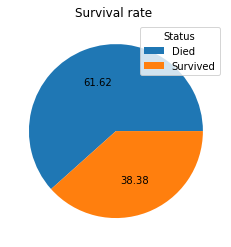

In [17]:
c = train_data['Survived'].dropna().value_counts()
c

plt.pie(c,autopct='%.2f')
plt.legend( labels =['Died','Survived'],title = "Status")
plt.title('Survival rate ')
plt.show()

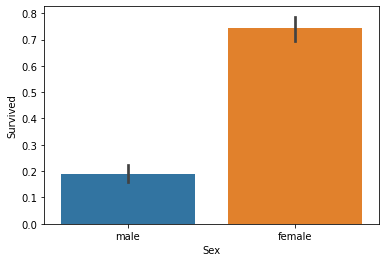

In [18]:
sns.barplot(x = "Sex", y = "Survived", data = train_data)
plt.show()

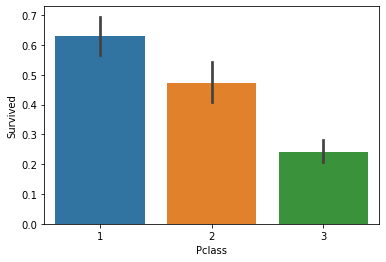

In [19]:
sns.barplot(x = "Pclass", y = "Survived", data = train_data)
plt.show()

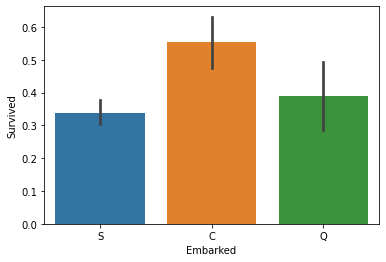

In [20]:
sns.barplot(x = "Embarked", y = "Survived", data = train_data)
plt.show()

From the previous visualizations we can conclude:

	• Survived people were less than the dead ones by more than 20%
    
	• Most of the survived people were females and most likely from the first and second class

Next, we need to get train and test data numerical by splitting the sex column to male and female columns filled with zeroes and ones and same for Embarked column, and also removing the name and ticket columns which are categorical values

In [21]:
#Converting data to numerical data

train_data[['Male','Female']]= pd.get_dummies(data=train_data['Sex'])
train_data[['PortQ','PortS','PortC']]= pd.get_dummies(data=train_data['Embarked'])
train_data.drop(columns = ['Sex','Embarked','Name','Ticket'], inplace = True)
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Male,Female,PortQ,PortS,PortC
PassengerId,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,0,1
2,1,1,38.0,1,0,71.2833,1,0,1,0,0
3,1,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,1,35.0,1,0,53.1000,1,0,0,0,1
5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [22]:
test_data[['Male','Female']]= pd.get_dummies(data=test_data['Sex'])
test_data[['PortQ','PortS','PortC']]= pd.get_dummies(data=test_data['Embarked'])
test_data.drop(columns = ['Sex','Embarked','Name','Ticket'], inplace = True)

# Model Building and Evaluation

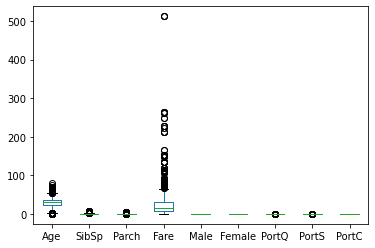

In [24]:
train_data.loc[:,'Age':'PortC'].plot(kind = 'box')
plt.show()

If the dataset has more Categorical data and consists of outliers as seen, it is better to use Random Forest Classifier.

In [25]:
from sklearn.model_selection import train_test_split

y = train_data.Survived
Xtrain = train_data[['Pclass', 'Age', 'SibSp','Parch','Fare','Male','Female','PortQ','PortS','PortC']]
Xtest = test_data[['Pclass', 'Age', 'SibSp','Parch','Fare','Male','Female','PortQ','PortS','PortC']]


X_train, X_test, y_train, y_test = train_test_split(Xtrain, y, test_size=0.3)
Xtrain

,Pclass,Age,SibSp,Parch,Fare,Male,Female,PortQ,PortS,PortC
PassengerId,,,,,,,,,,
1,3,22.000000,1,0,7.2500,0,1,0,0,1
2,1,38.000000,1,0,71.2833,1,0,1,0,0
3,3,26.000000,0,0,7.9250,1,0,0,0,1
4,1,35.000000,1,0,53.1000,1,0,0,0,1
5,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
887,2,27.000000,0,0,13.0000,0,1,0,0,1
888,1,19.000000,0,0,30.0000,1,0,0,0,1
889,3,29.699118,1,2,23.4500,1,0,0,0,1


In [26]:
y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [27]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Model fitting
clf.fit(X_train,y_train)


RandomForestClassifier()

In [28]:
# Model Accuracy
print("Accuracy:",clf.score( X_test,y_test))

Accuracy: 0.8283582089552238


In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
model_params = {
    'n_estimators': [50, 150, 250],
    'max_features': ['sqrt', 0.25, 0.5, 0.75, 1.0],
    'min_samples_split': [2, 4, 6]
}

In [31]:
grid_clf = GridSearchCV(clf, model_params, cv=5)
model = grid_clf.fit(Xtrain, y)
model.best_score_

0.8372857949908983

In [33]:
predictions = model.predict(Xtest)

In [35]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('output.csv', index=False)
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
